In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data cleaning

In [2]:
df_Photon = pd.read_csv('data_PHO_1616088414/weight.csv')
df_Photon["Date"] = pd.to_datetime(df_Photon["Date"], format='%Y-%m-%d %H:%M:%S')
df_Photon["name"] = "Photon"

df_Quark = pd.read_csv('data_QUA_1616088428/weight.csv')
df_Quark["name"] = "Quark"
df_Quark["Date"] = pd.to_datetime(df_Quark["Date"], format='%Y-%m-%d %H:%M:%S')

df_cats = pd.concat([df_Photon, df_Quark])
df_cats = df_cats[["Date", "Poids (kg)", "name"]]
df_cats.head()

,Date,Poids (kg),name
0,2021-01-25 08:44:30,6.04,Photon
1,2021-01-18 23:23:37,6.02,Photon
2,2021-01-17 07:17:35,5.97,Photon
3,2021-01-14 09:01:44,6.16,Photon
4,2021-01-13 14:46:15,6.10,Photon


from about March 2020 my scale no longer ditinguish between the cats      /ᐠᵕ̩̩̥ ‸ᵕ̩̩̥ ᐟ\ﾉ    so I'll use np.where to set the cat name manually

In [3]:
df_cats["name"] = np.where((df_cats["Date"] >= "2020-03-01") & (df_cats["Poids (kg)"] <= 5.7), "Quark",
                          np.where((df_cats["Date"] >= "2020-03-01") & (df_cats["Poids (kg)"] > 5.7), "Photon", df_cats["name"]))

In [4]:
df_Photon = df_cats[df_cats["name"] == "Photon"]
df_Quark = df_cats[df_cats["name"] == "Quark"]

# Weight analysis

## Weight dynamics

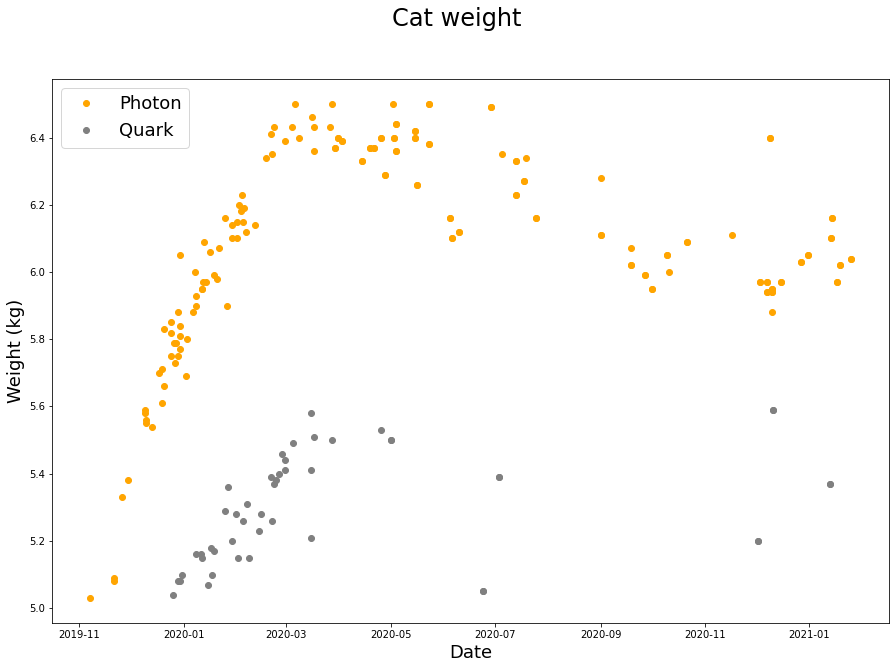

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot_date(x="Date", y="Poids (kg)", c="orange", data=df_Photon)
ax.plot_date(x="Date", y="Poids (kg)", c="grey", data=df_Quark)
fig.suptitle('Cat weight', fontsize=24)
ax.set_xlabel("Date", fontsize=18)
ax.set_ylabel("Weight (kg)", fontsize=18)
ax.legend(["Photon", "Quark"], fontsize=18)

Weight loss in March-April 2020 corresponds to change in their nutrition: from kitten croquettes to adult croquettes.

## Scale mania

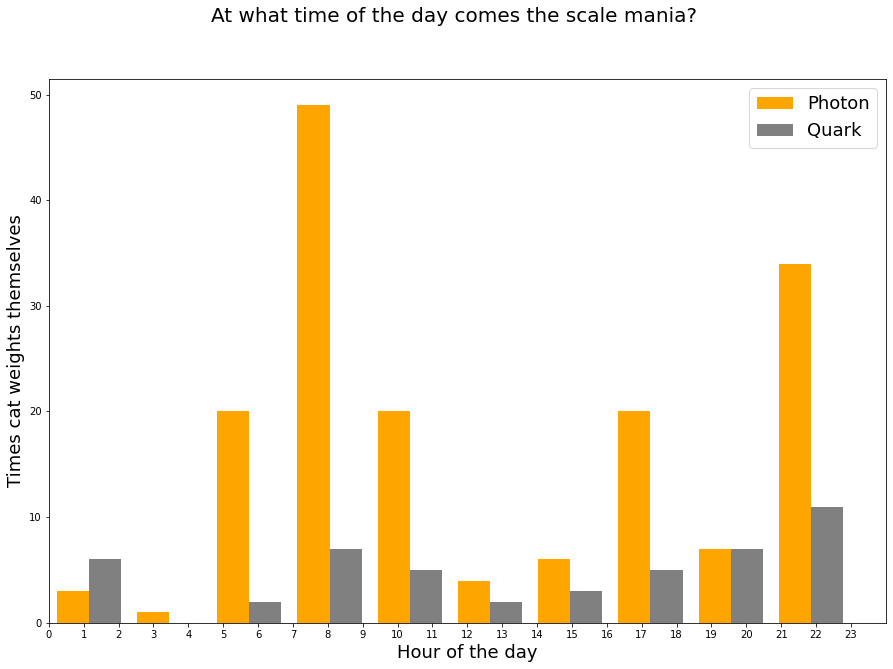

In [6]:
df_cats["Hours"] = df_cats["Date"].dt.hour
fig, ax = plt.subplots(figsize=(15, 10))
plt.hist([df_cats["Hours"][df_cats["name"]=="Photon"],df_cats["Hours"][df_cats["name"]=="Quark"]], color=["orange", "grey"])
fig.suptitle("At what time of the day comes the scale mania?", fontsize=20)
ax.set_xlabel("Hour of the day", fontsize=18)
ax.set_ylabel("Times cat weights themselves", fontsize=18)
ax.set(xlim=(0, 24))
x_ticks = np.arange(0, 24, 1)
plt.xticks(x_ticks)
ax.legend(["Photon", "Quark"], fontsize=18)

We could assume they end up playing around the scale at the same time together, but it's obvious that one cat is more weight-conscious.

## Temperature

To check if there's a correlation with weather outside and cat weight, I'll use the data available from Météo-France.

In [7]:
df_temp = pd.read_csv("donnees-synop-essentielles-omm.csv", sep=";")
df_temp = df_temp[["Date", "Température (°C)"]]
df_temp["Date"] = pd.to_datetime(df_temp["Date"].str.split("+",expand=True)[0], format='%Y-%m-%d %H:%M:%S')
df_temp.head()

,Date,Température (°C)
0,2020-04-14 17:00:00,13.0
1,2020-06-21 23:00:00,15.8
2,2020-06-22 08:00:00,14.2
3,2019-11-17 22:00:00,5.6
4,2019-11-22 19:00:00,10.4


In [8]:
df_Photon = pd.merge_asof(left=df_Photon.sort_values("Date"), right=df_temp.sort_values("Date"), on="Date")
df_Quark = pd.merge_asof(left=df_Quark.sort_values("Date"), right=df_temp.sort_values("Date"), on="Date")

Linear correlation coefficients between temperature and weight

In [9]:
df_Photon["Température (°C)"].corr(df_Photon["Poids (kg)"])

0.2217298850443298

In [10]:
df_Quark["Température (°C)"].corr(df_Quark["Poids (kg)"])

-0.10677595313312592

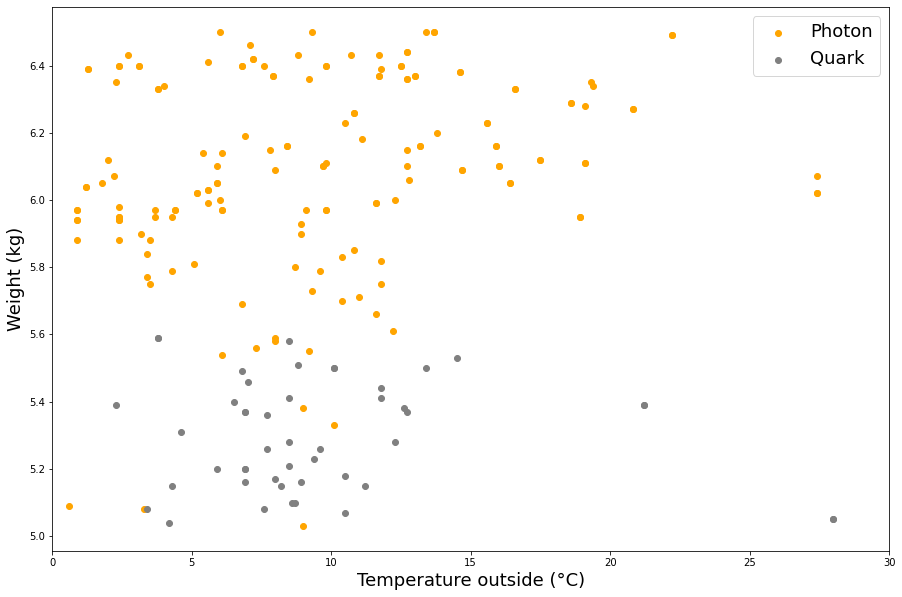

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(x="Température (°C)", y="Poids (kg)", c="orange", data=df_Photon)
ax.scatter(x="Température (°C)", y="Poids (kg)", c="gray", data=df_Quark)
ax.set_xlabel("Temperature outside (°C)", fontsize=18)
ax.set_ylabel("Weight (kg)", fontsize=18)
ax.set(xlim=(0, 30))
ax.legend(["Photon", "Quark"], fontsize=18)

ಇ/ᐠ ̥ᵔ  ̮  ᵔ ̥ ᐟ\ಇ   ಇ/ᐠ ̥ᵔ  ̮  ᵔ ̥ ᐟ\ಇ